Loading the Data
2. Cleaning the Data
3. Examining the Correlation Between the Features
4. Plotting the Correlation Between Features
5. Evaluating the Algorithms
a. Logistic Regression
b. K-Nearest Neighbors (KNN)
c. Support Vector Machines (SVM)—Linear and RBF Kernels
6. Selecting the Best Performing Algorithm
7. Performing predictions using the best model from # 6 above

1. Loading the Data

In [52]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2. Cleaning the Data

In [53]:
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [54]:
print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [55]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
  df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

df.fillna(df.mean(), inplace = True)

print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


3. Examining the Correlation Between the Features

In [56]:
corr = df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

4. Plotting the Correlation Between Features

<ipython-input-57-d116bbb04e09>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


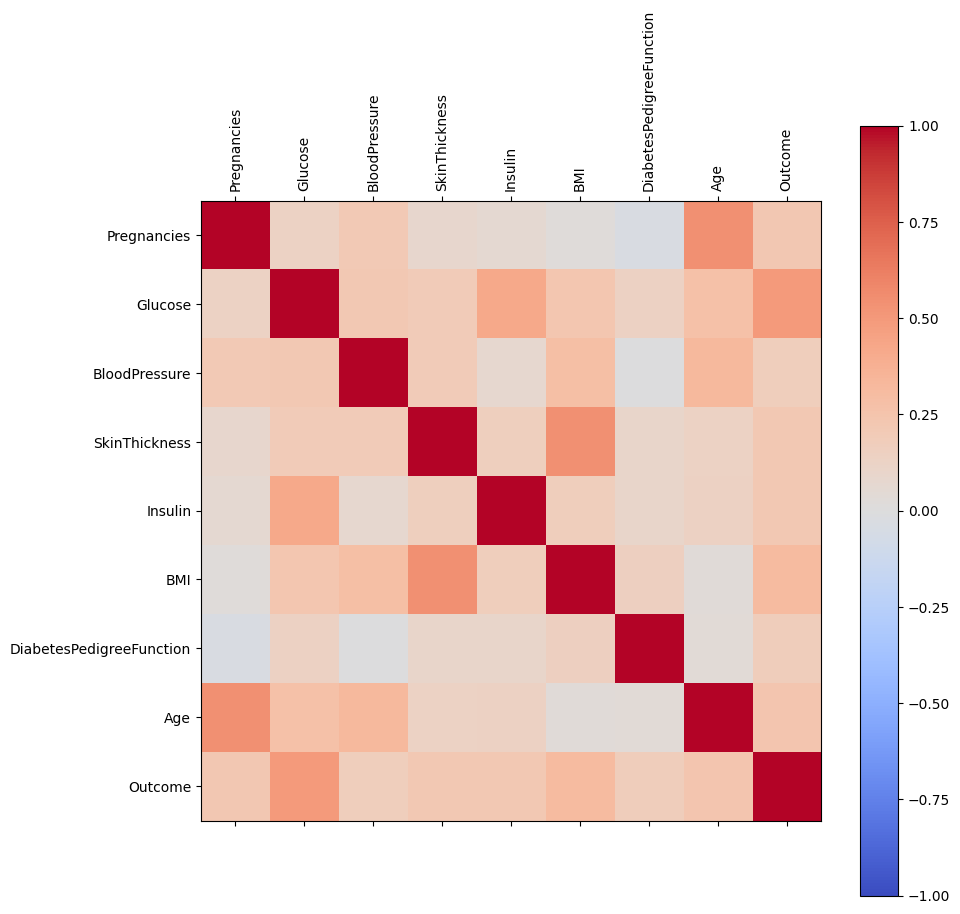

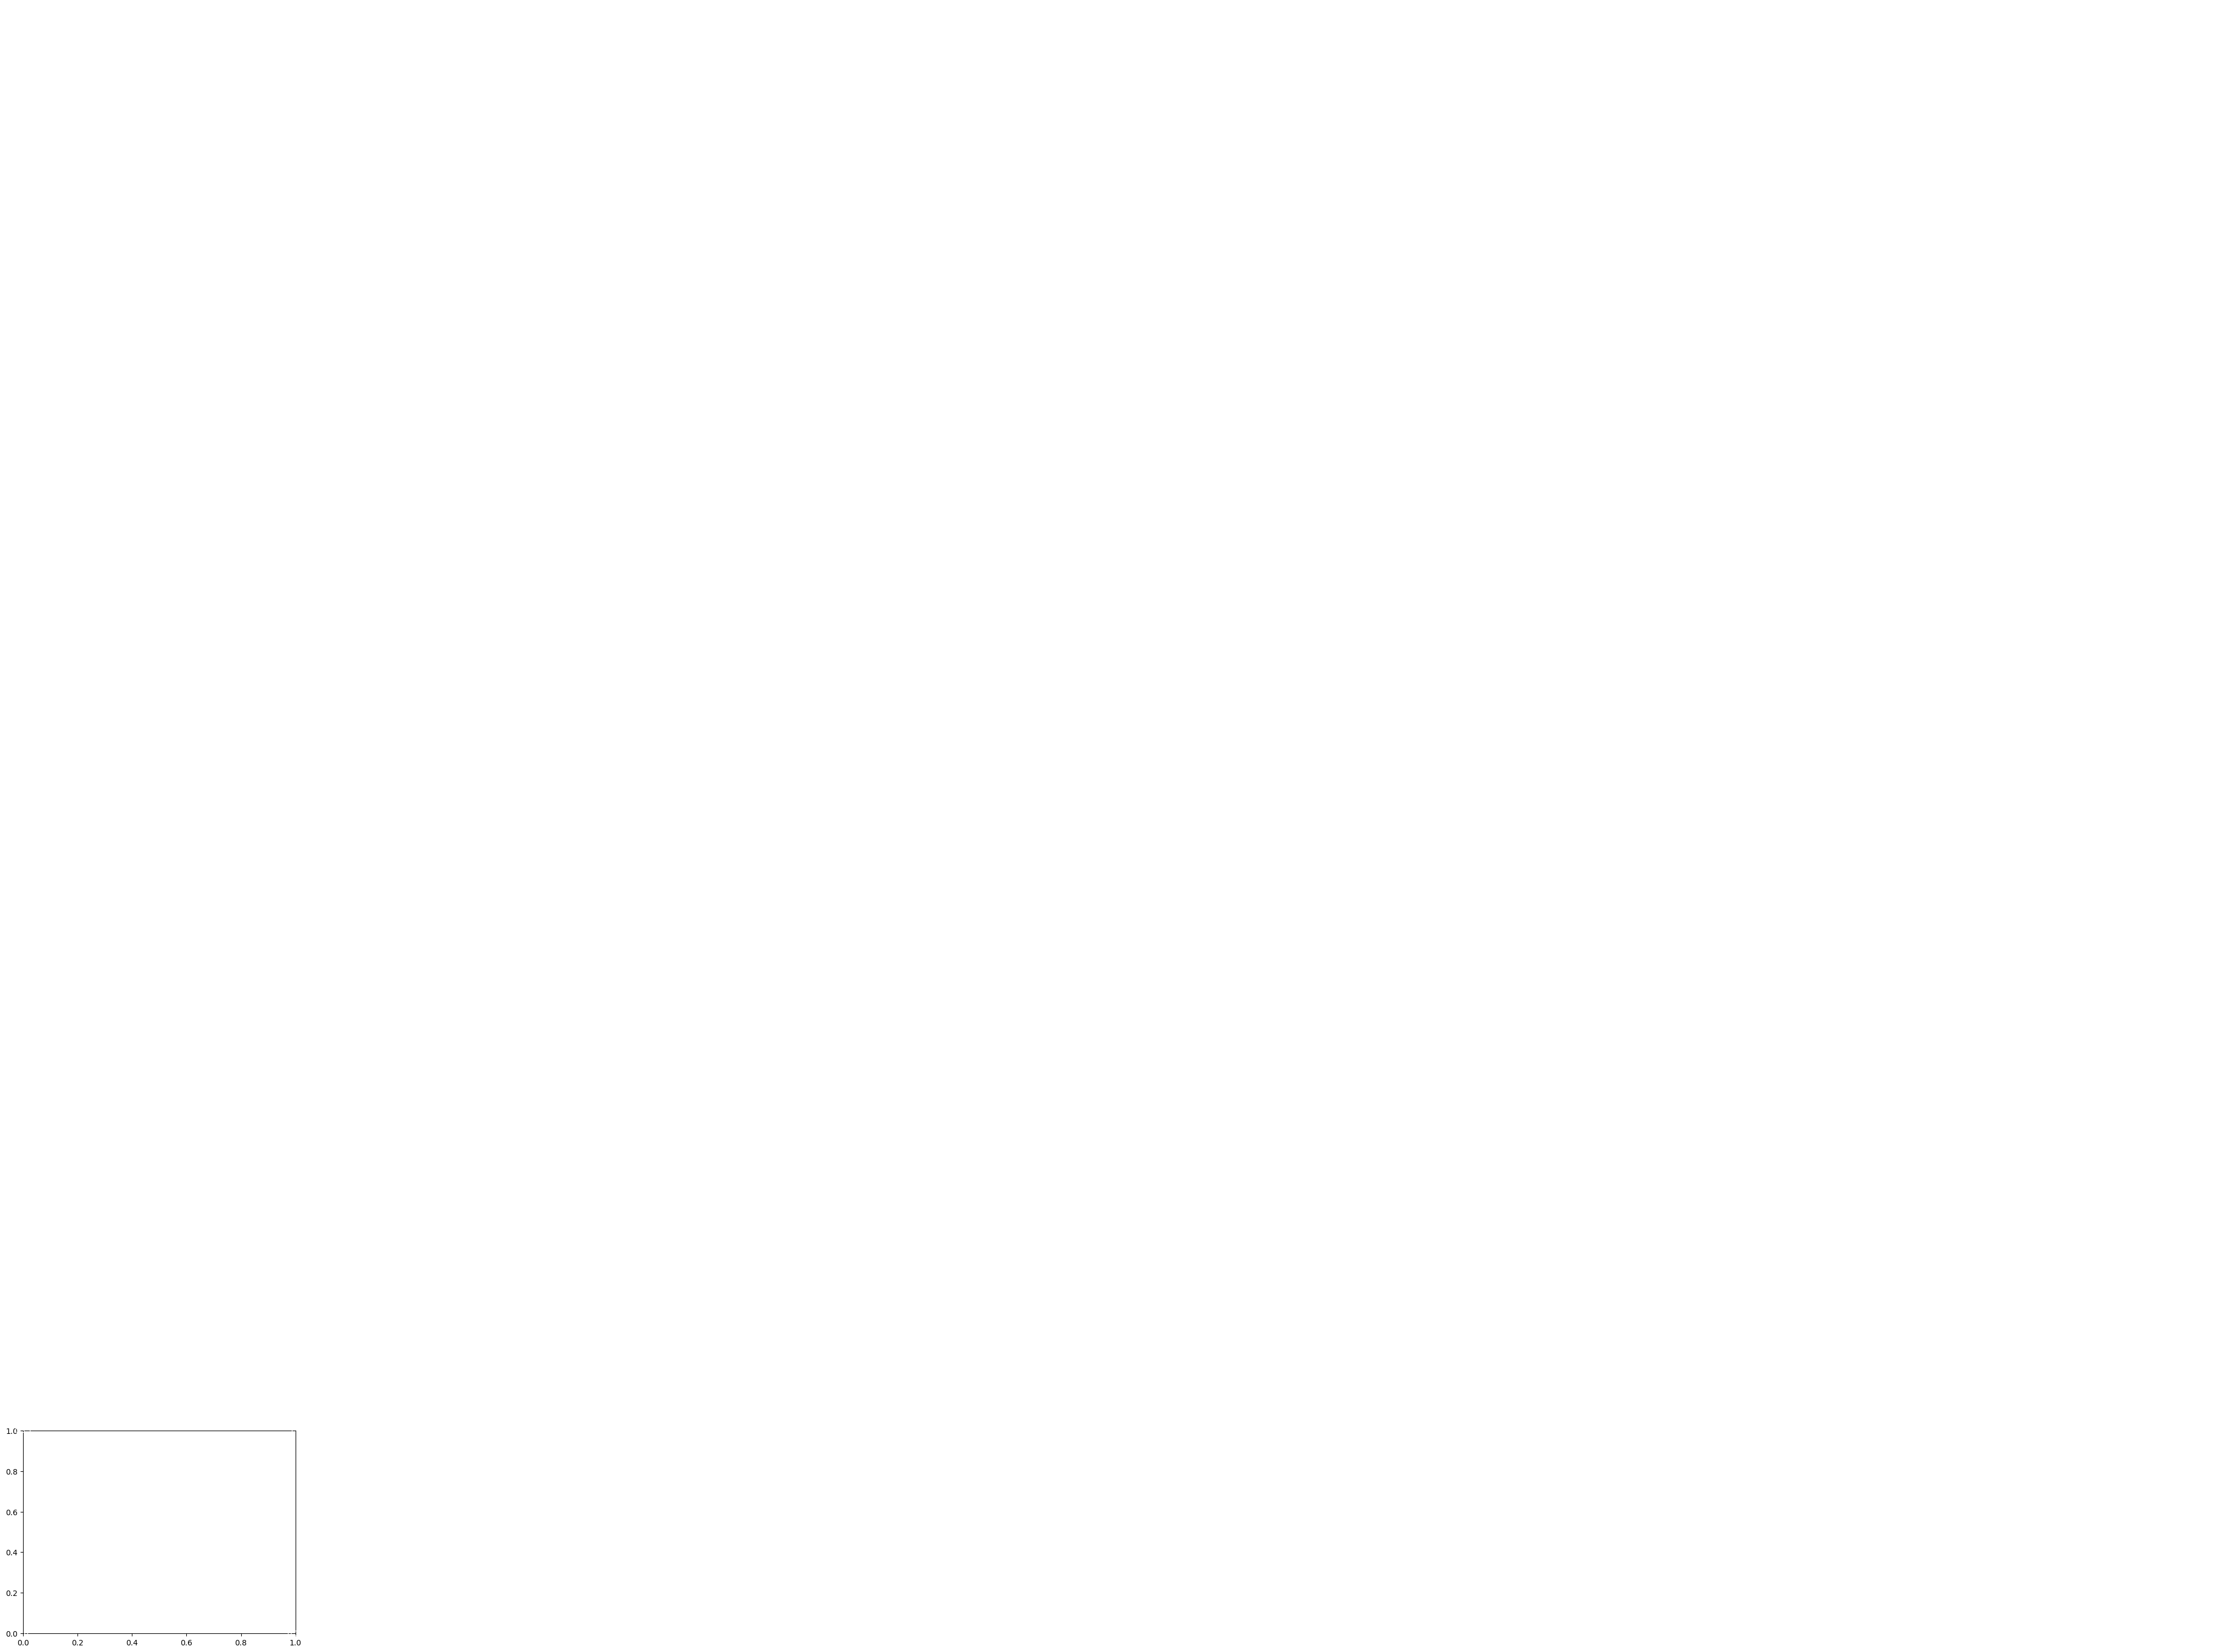

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow (corr, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)

ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)

fig, ax = plt.subplots()

for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i, j], 2), ha="center", va="center", color="w")

plt.show()

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')


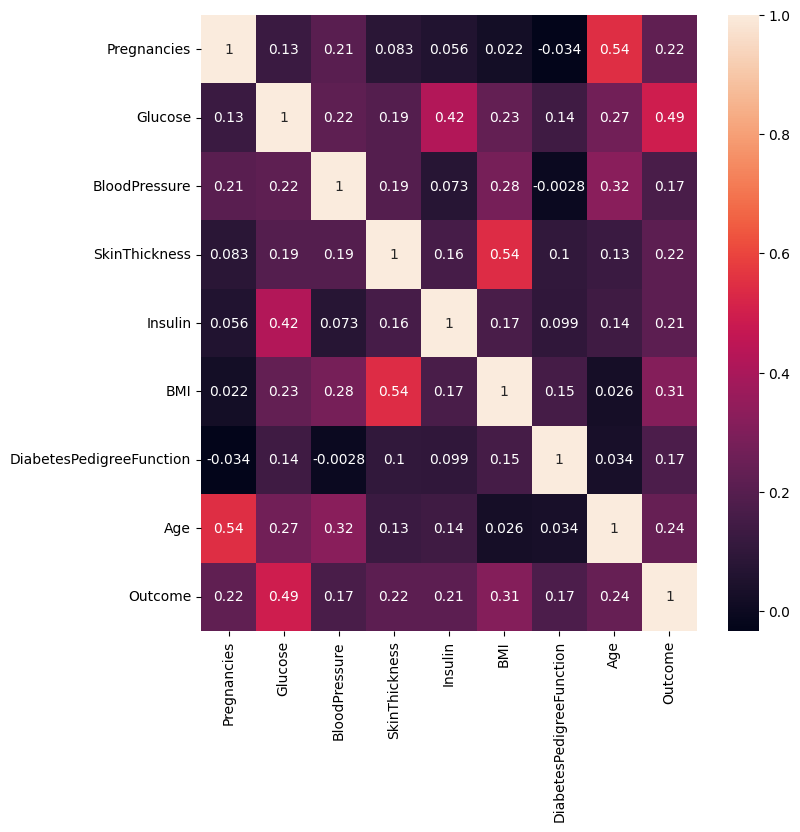

In [58]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

fig = plt.gcf()
fig.set_size_inches(8,8)

print(df.corr().nlargest(4, 'Outcome').index)

In [59]:
print(df.corr().nlargest(4, 'Outcome').values[:,8])

[1.         0.49292767 0.31192439 0.23835598]


5. evaluating the Algorithms

a. Logistic Regression

In [60]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

x = df[['Glucose','BMI','Age']]

y = df.iloc[:,8]

log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, x, y, cv=10,scoring='accuracy').mean()

print(log_regress_score)

0.7669856459330144


In [61]:
result = []
result.append(log_regress_score)

b. K-Nearest Neighbors (KNN)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

cv_scores = []

folds = 10

ks = list(range(1,int(len(x) * ((folds - 1)/folds)), 2))

for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score (knn, x, y, cv=folds, scoring='accuracy').mean()
  cv_scores.append(score)

knn_score = max(cv_scores)

optimal_k = ks[cv_scores.index(knn_score)]

print (f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 19
0.7721462747778537


c. Support Vector Machines (SVM)

In [63]:
from sklearn import svm

linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, x, y, cv=10, scoring='accuracy').mean()

print(linear_svm_score)
result.append(linear_svm_score)

0.7656527682843473


In [71]:
 rbf = svm.SVC(kernel='rbf')
 rbf_score = cross_val_score(rbf, x, y, cv=10, scoring='accuracy').mean()
 print(rbf_score)
 result.append(rbf_score)

0.765704032809296


6. Selecting the Best Performing algorithm

In [65]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.772146
Logistic Regression,0.766986
SVM RBF Kernel,0.765704
SVM Linear Kernel,0.765653


In [68]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=19)

7. Perform Predictions Using the Best Model

In [69]:
import pickle

filename = 'diabetes.sav'

pickle.dump(knn, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

Glucose = 65
BMI = 70
Age = 50

prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
  print("Non-diabetic")
else:
  print("Diabetic")

[0]
Non-diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [70]:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.94736842 0.05263158]]
Confidence: 94.74%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
